In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
from pyMFI import MFI
from pyMFI import MFI1D
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.size": 22, "font.family": "serif", "font.serif": ["computer modern roman"]})
plt.rcParams.update({"font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

times = r"$\times$"
pwr_neg = r"$^{-1}$"


The path is: /home/ucecabj/Desktop/pyMFI_git


# Figure1A: On the fly Error in 1D.

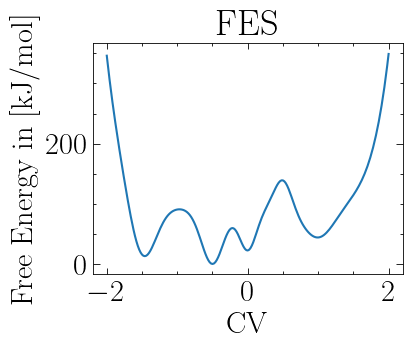

In [2]:
#Define grid and analytical function
x=np.linspace(-2,2,201)
y=1*x**8-50*np.exp(-(x-1)**2/0.1)-93*np.exp(-(x+0.5)**2/0.05)-103*np.exp(-(x+1.5)**2/0.07)-70*np.exp(-(x)**2/0.03)+50*np.exp(-(x-0.5)**2/0.03)
y = y - np.min(y)

#Plot function
plt.figure(figsize=(4,3)); plt.plot(x,y); plt.xlabel("CV"); plt.ylabel("Free Energy in [kJ/mol]"); plt.title("FES"); plt.show()

In [3]:
# os.chdir(path_manustript + "Figure1A")

# #Run simulation
# run_plumed.run_langevin1D(analytical_function = "1*x^8-50*exp(-(x-1)^2/0.1)-93*exp(-(x+0.5)^2/0.05)-103*exp(-(x+1.5)^2/0.07)-70*exp(-(x)^2/0.03)+50*exp(-(x-0.5)^2/0.03)", initial_position=-1.5, simulation_steps = 2000000 ,gaus_width=0.1, gaus_height=2.5, biasfactor=20, gaus_pace=100)

20.0 %   OFE = 27.8021
40.0 %   OFE = 25.9624
60.0 %   OFE = 25.0956
80.0 %   OFE = 24.8555
100.0 %   OFE = 29.3679


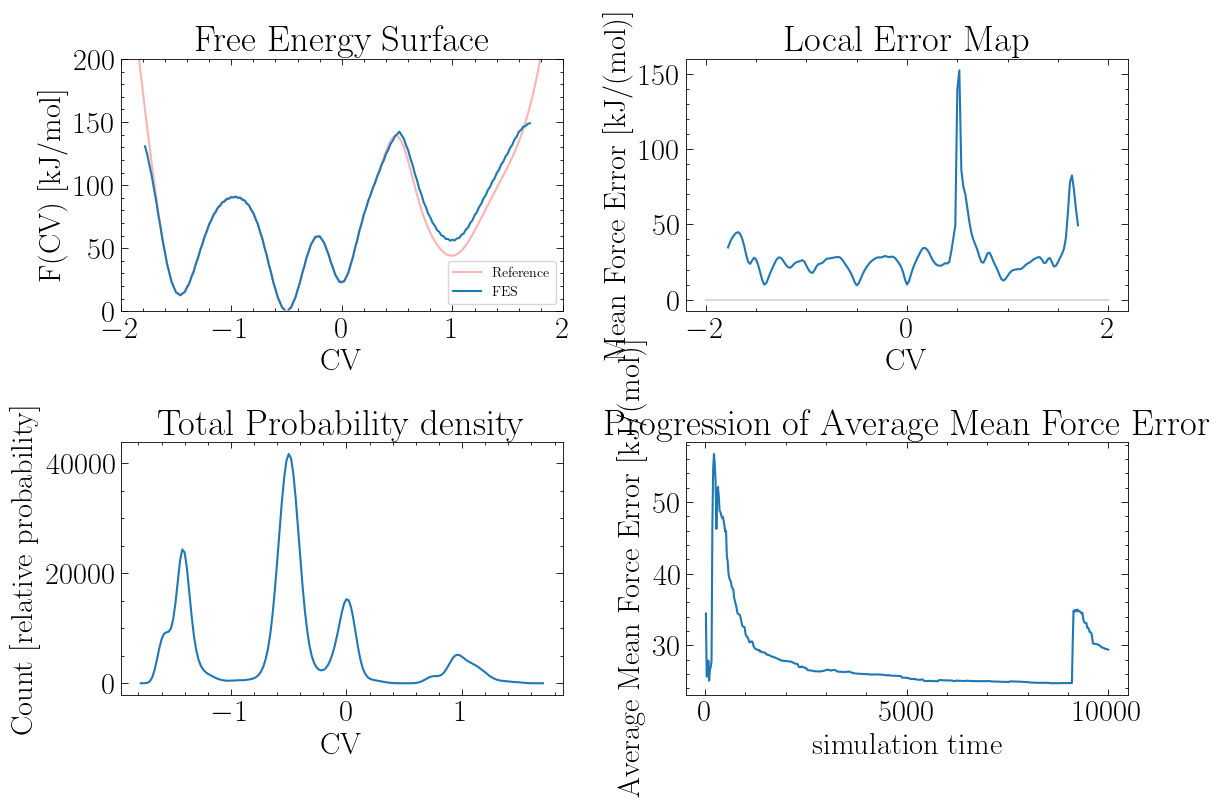

In [3]:
os.chdir(path_manustript + "Figure1A")

#Read the HILLS file
HILLS=MFI1D.load_HILLS(hills_name="HILLS")


#Read the Colvar File
position = MFI1D.load_position(position_name="position")

#Compute the time-independent mean force
# [X, Ftot_den, Ftot, ofv, ofe, ofv_history, ofe_history, time_history, intermediate_fes_list, intermediate_time_list] = MFI1D.MFI_1D_cutoff(HILLS = HILLS, position = position, bw = 0.1, kT = 1, log_pace = 5, error_pace = 100, min_grid=-2.0, max_grid=2.0, WellTempered=1, intermediate_fes_number=100, truncation_limit=10**-5)
# [X, Ftot_den, Ftot, FES, ofv, ofe, ofv_history, ofe_history, time_history, intermediate_fes_list, intermediate_time_list] 

X, Ftot_den, Ftot_den2, Ftot, ofv_num, FES, ofv, ofe, cutoff, error_evol, fes_error_cutoff_evol = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.03, kT = 1, log_pace = 4000, error_pace = int(len(HILLS)/500), min_grid=-2, max_grid=2, WellTempered=1, FES_cutoff=-1, Ftot_den_cutoff=0.1, save_intermediate_fes_error_cutoff = True, use_weighted_st_dev=True)

# Integrate Ftot, obtain FES 
FES = MFI1D.intg_1D(Ftot, X[1]-X[0])

# Plot Recap
MFI1D.plot_recap(X, MFI1D.zero_to_nan(FES*cutoff), MFI1D.zero_to_nan(Ftot_den*cutoff), MFI1D.zero_to_nan(ofe*cutoff), error_evol[1], error_evol[3], y_ref=y, FES_lim=200, ofe_lim = 0, error_log_scale=0)

454
455
456


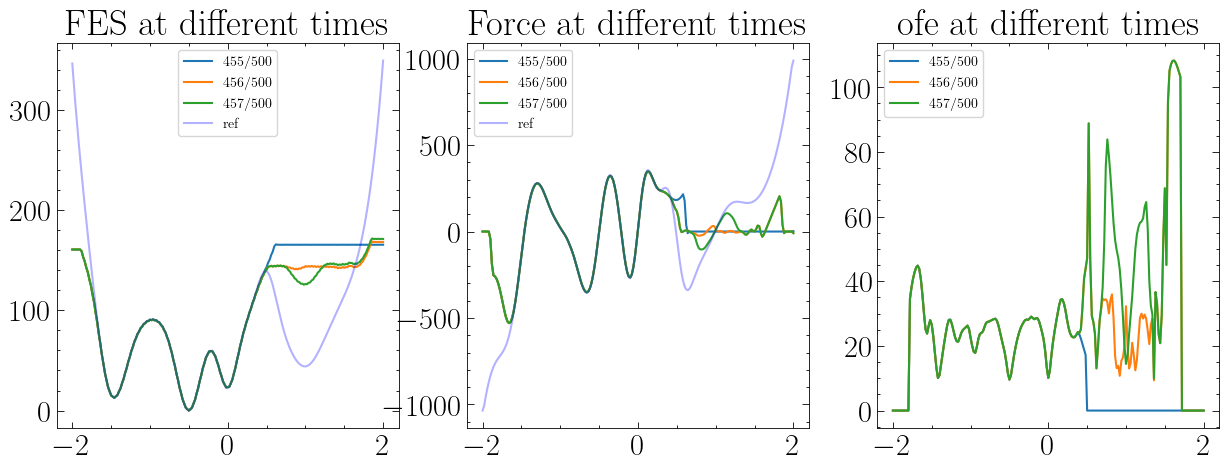

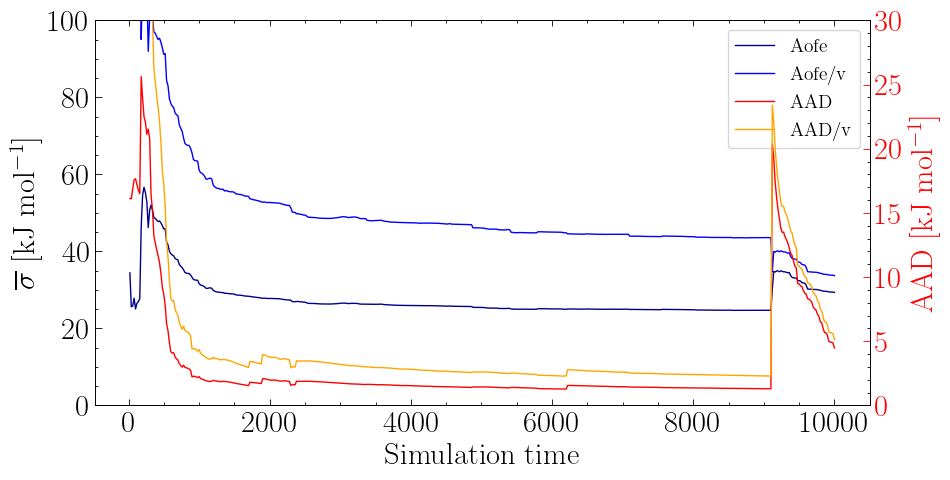

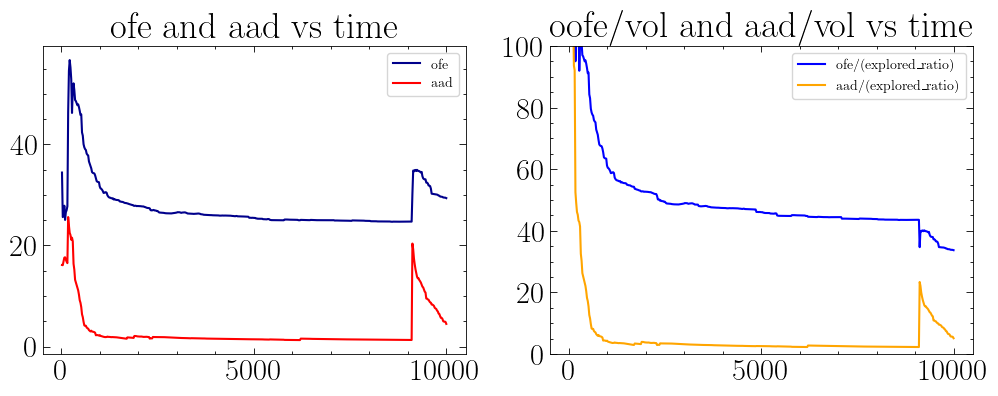

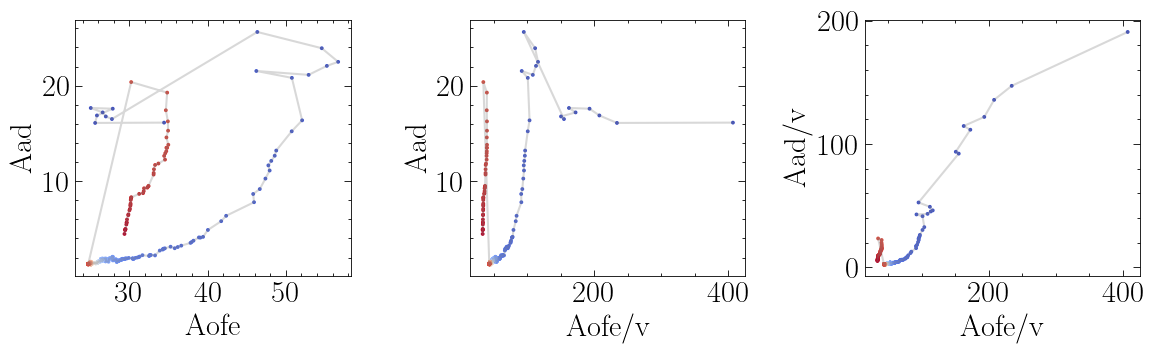

In [4]:
plt.figure(1, figsize=(15,5))
aad_evol = []
aad_v_evol = []
for i in range(len(fes_error_cutoff_evol[0])):
    
    FES = fes_error_cutoff_evol[0,i] 
    AD = abs(FES - y) * fes_error_cutoff_evol[3,i]
    AAD = np.sum(AD) / np.count_nonzero(fes_error_cutoff_evol[3,i])
    volume = np.count_nonzero(fes_error_cutoff_evol[3,i]) / len(fes_error_cutoff_evol[3,i])
    aad_evol.append(AAD)
    aad_v_evol.append(AAD / volume)
    if (i+1) >= 455 and (i+1) <= 457:#and (i+1)%20 == 0:
        print(i)
        plt.figure(1, figsize=(8,4)) 
        plt.subplot(1,3,1)
        plt.plot(x,FES, label=str(i+1)+"/500")
        plt.subplot(1,3,2)
        plt.plot(x,np.gradient(FES,x), label=str(i+1)+"/500")
        plt.subplot(1,3,3)
        plt.plot(x, fes_error_cutoff_evol[2,i], label=str(i+1)+"/500")

plt.figure(1, figsize=(8,4))
plt.subplot(1,3,1)
plt.plot(x,y, c="b", alpha=0.3, label="ref"); plt.title("FES at different times"); plt.legend(fontsize=10)
plt.subplot(1,3,2)
plt.plot(x,np.gradient(y,x), c="b", alpha=0.3, label="ref"); plt.title("Force at different times"); plt.legend(fontsize=10)
plt.subplot(1,3,3)
plt.legend(fontsize=10); plt.title("ofe at different times")
plt.show()



fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1.plot( error_evol[3], error_evol[1], c="darkblue",linewidth=1,label="Aofe")
ax1.plot( error_evol[3], error_evol[1]/error_evol[2] ,c='blue',linewidth=1,label="Aofe/v")
ax2.plot( error_evol[3], aad_evol, c="red" ,linewidth=1,label="AAD")
ax2.plot( error_evol[3], aad_evol/error_evol[2],c="orange",linewidth=1, label="AAD/v")
# ax2.plot([1511,1511], [0.8,4], c="grey", label="Exploration of 2nd Basin")

ax1.set_xlabel("Simulation time"); ax1.set_ylabel("$\overline{\sigma}$ [kJ mol$^{-1}$]", c="black"); ax2.set_ylabel("AAD [kJ mol$^{-1}$]", c="red"); ax2.tick_params('y', colors='r')
ax1.set_ylim(0,100) ;ax2.set_ylim(0,30)

handles1, labels1 = ax1.get_legend_handles_labels(); handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)
plt.show()



plt.figure(3, figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(error_evol[3], error_evol[1], c="darkblue", label="ofe")
# plt.scatter(error_evol[3], error_evol[1], c="darkblue",s=3)
plt.plot(error_evol[3], aad_evol, label="aad",c="red")
# plt.scatter(error_evol[3], aad_evol,s=3,c="red")
plt.title("ofe and aad vs time"); plt.legend(fontsize=10); 

plt.subplot(1,2,2)
plt.plot(error_evol[3], error_evol[1]/error_evol[2], c="blue", label="ofe/(explored_ratio)")
# plt.scatter(error_evol[3], error_evol[1]/error_evol[2], c="blue",s=3)
plt.plot(error_evol[3], aad_evol/error_evol[2], label="aad/(explored_ratio)",c="orange")
# plt.scatter(error_evol[3], aad_v_evol,s=3,c="orange")
plt.title("oofe/vol and aad/vol vs time"); plt.legend(fontsize=10); 
plt.ylim(0,100)
plt.show()

plt.figure(3, figsize=(12,4))
plt.subplot(1,3,1)
cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(aad_evol))
plt.scatter(error_evol[1], aad_evol ,s=3, c=range(len(aad_evol)), cmap=cmap, norm=norm)
plt.plot(error_evol[1], aad_evol, c="grey", alpha=0.3); #plt.title("ofe vs. AAD evol")#; plt.show()#; plt.yscale("log"); plt.xscale("log")
plt.xlabel("Aofe"); plt.ylabel("Aad")

plt.subplot(1,3,2)
plt.scatter(error_evol[1]/error_evol[2], aad_evol ,s=3, c=range(len(aad_evol)), cmap="coolwarm", norm=norm)
plt.plot(error_evol[1]/error_evol[2], aad_evol, c="grey", alpha=0.3); #plt.title("ofe/vol vs. AAD evol")#; plt.show()#; plt.yscale("log"); plt.xscale("log")
plt.xlabel("Aofe/v"); plt.ylabel("Aad")

plt.subplot(1,3,3)
plt.scatter(error_evol[1]/error_evol[2], aad_v_evol ,s=3, c=range(len(aad_evol)), cmap="coolwarm", norm=norm)
plt.plot(error_evol[1]/error_evol[2], aad_v_evol, c="grey", alpha=0.3); plt.xlabel("Aofe/v"); plt.ylabel("Aad/v");# plt.title("ofe/vol vs. AAD/vol evol")
plt.tight_layout(); plt.show()#; plt.yscale("log"); plt.xscale("log")
    

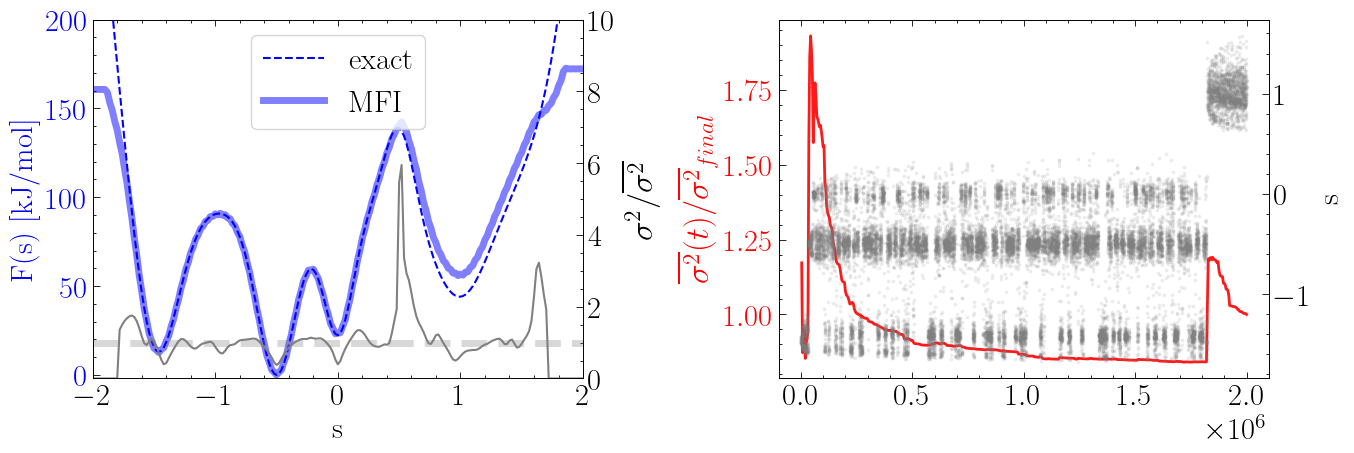

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

#Left plot
axs[0].set_ylabel('F(s) [kJ/mol]',color='blue')
axs[0].set_xlabel('s')
axs[0].set_xlim(-2,2)
axs[0].set_ylim(-2,200)
axs[0].plot(x, y-min(y),'--',color='blue',label='exact');
axs[0].plot(X, FES,color='blue',linewidth=5,alpha=0.5,label="MFI");
axs[0].tick_params(axis ='y', labelcolor = 'blue')

ax1 = axs[0].twinx()
ax1.set_ylabel('$\sigma^2/\overline{\sigma^2}$', fontsize=24, color='black')
ax1.tick_params(axis ='y', labelcolor = 'black', right = True , labelright = True ) 
ax1.set_ylim([0, 10] ) 
ax1.plot(X, ofe/np.mean(ofe),color="grey",label="$\sigma^2(s)$");
ax1.plot(X, np.zeros(len(X))+1,'--',linewidth=5,color="grey", alpha=0.3,label="$\overline{\sigma^2(s)}$");

axs[0].legend()

#Right plot
ax2 = axs[1].twinx()

axs[1].plot([time/0.005 for time in error_evol[3]], error_evol[1]/error_evol[1][np.size(error_evol[1])-1],color='red',linewidth=2,alpha=0.9);
axs[1].set_ylabel('$\overline{\sigma^2}(t)/\overline{\sigma^2}_{final}$', fontsize=24, color='red')
axs[1].tick_params(axis ='y', labelcolor = 'red')
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('s',color='black')
ax2.tick_params(axis ='y', labelcolor = 'black')
ax2.scatter(HILLS[:,0]/0.005,HILLS[:,1],color='grey',s=3, alpha=0.1)

fig.tight_layout()    

plt.savefig('Figure1A', dpi=600, bbox_inches='tight')
